# Guía 4: Números aleatorios

## Introducción

Para generar números aleatorios podemos usar `NumPy`.

In [1]:
import numpy as np

Por ejemplo, la siguiente línea de código nos devuelve un número aleatorio uniformemente distribuído entre 0 y 1.

In [2]:
np.random.rand()

0.9002214068513684

Podemos fijarle la semilla para que siempre nos devuelva el mismo número

In [3]:
np.random.seed(seed=1234)
np.random.rand()

0.1915194503788923

La siguiente celda con código genera una distribución aleatoria de 100000 elementos que luego son graficados en un histograma para verificar que la distribución es uniforme.

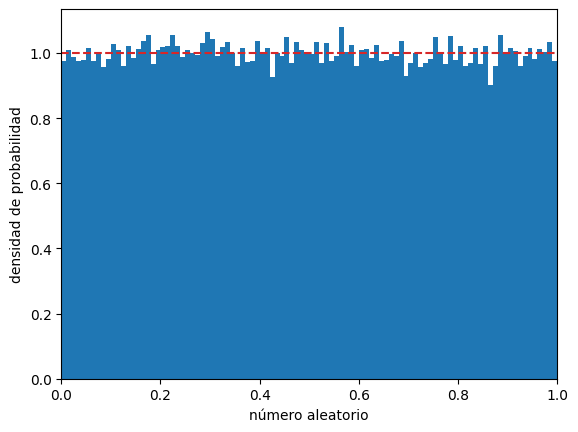

In [4]:
import matplotlib.pyplot as plt

np.random.seed(seed=192857)
rand_values = np.random.rand(100000)

# grafica un histograma de 100 bins y chequeamos que da 1
plt.hist(rand_values, bins=100, density=True)
plt.plot([0, 1], [1, 1], color="tab:red", linestyle="dashed")
plt.xlim((0.0, 1.0))

plt.ylabel("densidad de probabilidad")
plt.xlabel("número aleatorio")
plt.show()

## Ejercicios de programación

1. Escriba un código para generar números aleatorios exponencialmente distribuidos en el intervalor $[0, \infty)$. Para comprobar que los números generados obedecen la distribución buscada, realizar un histograma.

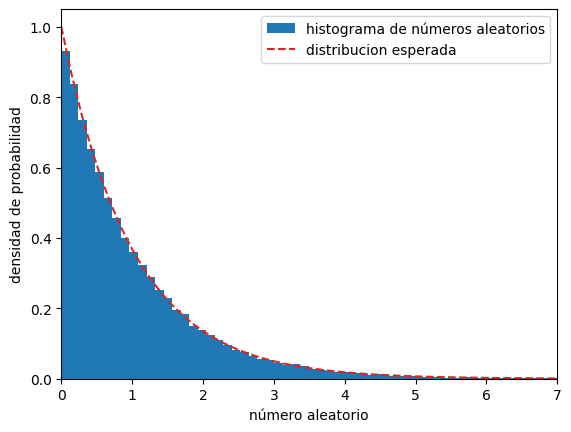

In [5]:
# rand_values = - np.log(1 - np.random.rand(100000))
rand_values = np.random.exponential(size=100000)

plt.hist(rand_values, bins=100, density=True, label="histograma de números aleatorios")

xvals = np.linspace(0, 7)
yvals = np.exp(-xvals)
plt.plot(xvals, yvals, color="tab:red", linestyle="dashed", label="distribucion esperada")
plt.xlim((0, 7))

plt.ylabel("densidad de probabilidad")
plt.xlabel("número aleatorio")
plt.legend()
plt.show()

2. Escriba un código para evaluar la integral $$\int_0^1 \frac{1}{1 + x^2} dx$$ con el método de Monte Carlo y usando un muestreo uniforme.

In [6]:
def func(x):
    return 1 / (1 + x**2)

exacta = np.arctan(1)
nvalues = np.arange(30, 1e4, dtype=int)

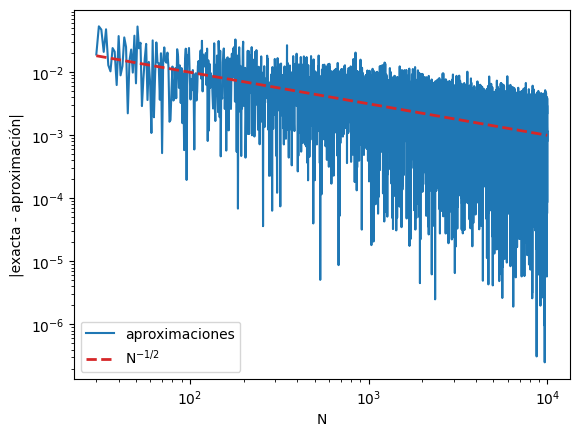

In [7]:
def montecarlo_method(func, a, b, nsamples):
    return np.mean(func(np.random.uniform(a, b, nsamples))) * (b - a)

aproximaciones = [
    montecarlo_method(func, 0, 1, mcsamples) for mcsamples in nvalues
]

plt.plot(nvalues, np.abs(exacta - aproximaciones), label="aproximaciones")
plt.plot(nvalues, 0.1 / np.sqrt(nvalues), c="tab:red", lw=2, ls="--", label=r"N$^{-1/2}$")

plt.xlabel("N")
plt.ylabel("|exacta - aproximación|")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

3. Comparar el resultado obtenido en el ejercicio anterior a través de un muestreo de importancia, utilizando la función de peso $$u(x) = \frac{1}{3} (4 - 2x).$$ Para generar los números aleatorios, considerar el método de transformación de una variable aleatoria uniforme y el método del rechazo.

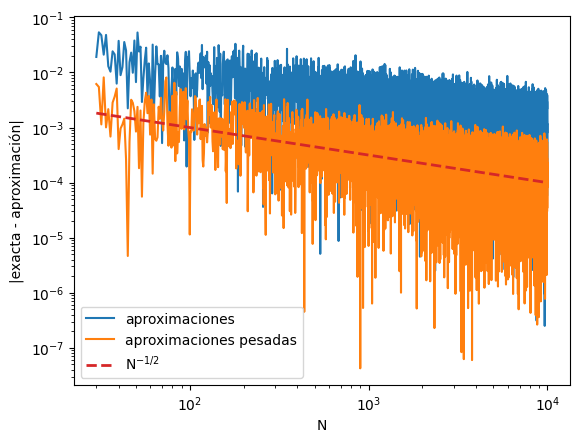

In [8]:
def weighted_montecarlo_method(func, a, b, nsamples):
    weighted = 2 - np.sqrt(4 - 3 * np.random.uniform(a, b, nsamples))
    weight = 3 / (4 - 2 * weighted)
    return np.mean(weight * func(weighted))

aproximaciones_pesadas = [
    weighted_montecarlo_method(func, 0, 1, mcsamples) for mcsamples in nvalues
]

plt.plot(nvalues, np.abs(exacta - aproximaciones), label="aproximaciones")
plt.plot(nvalues, np.abs(exacta - aproximaciones_pesadas), label="aproximaciones pesadas")
plt.plot(nvalues, 0.01 / np.sqrt(nvalues), c="tab:red", lw=2, ls="--", label=r"N$^{-1/2}$")

plt.xlabel("N")
plt.ylabel("|exacta - aproximación|")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

y ahora con el método del rechazo (notar que no es una buena elección esta función ya que se rechazan muchos números, por eso no se obtiene la disminución esperada en el error en función de N)

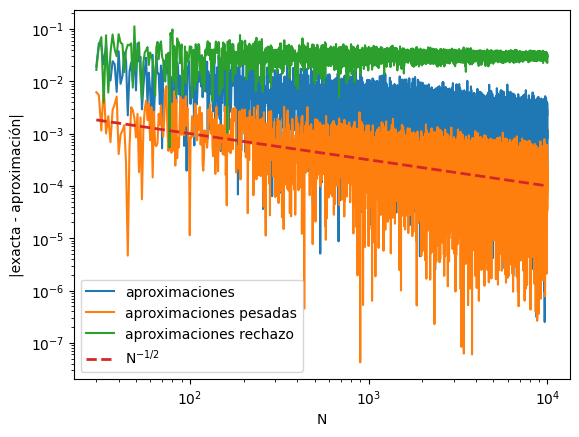

In [9]:
def rejection_montecarlo_method(func, a, b, nsamples):
    u = lambda x: (4 - 2 * x) / 3

    x = np.random.uniform(a, b, nsamples)
    y = np.random.uniform(0, 2, nsamples)
    
    return np.mean(func(x[y <= u(x)]))

aproximaciones_rechazo = [
    rejection_montecarlo_method(func, 0, 1, mcsamples) for mcsamples in nvalues
]

plt.plot(nvalues, np.abs(exacta - aproximaciones), label="aproximaciones")
plt.plot(nvalues, np.abs(exacta - aproximaciones_pesadas), label="aproximaciones pesadas")
plt.plot(nvalues, np.abs(exacta - aproximaciones_rechazo), label="aproximaciones rechazo")
plt.plot(nvalues, 0.01 / np.sqrt(nvalues), c="tab:red", lw=2, ls="--", label=r"N$^{-1/2}$")

plt.xlabel("N")
plt.ylabel("|exacta - aproximación|")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()